# PROJECT SETUP

### IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import sys

### COLLECTING DATA

In [2]:
subjects_quantity = 40
sbj_photos = 10

people_raw = list() # ALL 10 PHOTOS FROM EACH PERSON
people_subjects = list() # FIRST PHOTO FROM EARCH PERSON
people_dataset_raw = list() # 9 PHOTOS FOR EACH PERSON DATASET

for j in range(1, subjects_quantity+1):
    # For para cada imagem
    for i in range(1, sbj_photos+1):
        people_raw.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))
        if i == 1:
            people_subjects.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))
        if i != 1:
            people_dataset_raw.append(np.array(cv2.imread(f'./orl_faces/orl_faces/s{j}/{i}.pgm',0)))

In [3]:
print(f"Dataset size: {len(people_dataset_raw)}")

Dataset size: 360


### RAW DATA SHOW UP

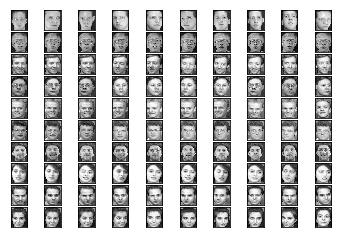

In [4]:
nrows, ncols = 10, 10

for j in range(0,nrows*ncols,10):
    for i in range(1,11):
        plt.subplot(nrows, ncols, i + j)
        plt.imshow(people_raw[i-1 + j], cmap = 'gray')
        plt.xticks([]), plt.yticks([])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)
plt.show()

### BELOW, ALL THE ARRAYS ARE DATASET ONLY

Creating an array with fourier transform from raw data set array:

In [5]:
people_fft = [np.fft.fft2(person) for person in people_dataset_raw]

'people_fft' is now an array containing a fourier transformed version of each photo from the dataset.

To conclude an ideal analysis, the original fourier transformed image is not the easiest data to work with, so, the purpose of the next command is to create a  version of each imagem with it's relative relevant data shifted to the center of the picture.

In [6]:
people_fft_s = [np.fft.fftshift(person) for person in people_fft]

Now, showing one example from the raw data, the fourier transformed, and the shifted one:

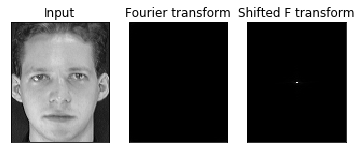

In [7]:
plt.subplot(131)
plt.imshow(people_raw[0], cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])

plt.subplot(132)
plt.imshow(np.abs(people_fft[0]), cmap = 'gray')
plt.title('Fourier transform'), plt.xticks([]), plt.yticks([])

plt.subplot(133)
plt.imshow(np.abs(people_fft_s[0]), cmap = 'gray')
plt.title('Shifted F transform'), plt.xticks([]), plt.yticks([])

plt.show()

# FINISHED SETUP

### STARTING THE PROJECT

The next part of the project consists of:

1. Analyze the mean square error
1. Classify
1. TODO(CONSERTAR E COMPLETAR ESSA LISTA)


We need to create a function that returns only the relevant part of the image based on an user input. That integer input will be the dimensions of the usable image data.

Ex.: N is the input for an NxN classification test.

In [113]:
def cut_img(n, image):
    # IMAGE DIMENSIONS FROM THE DATABASE
    image_width = 92
    image_height = 112
    
    # CENTER OF THE IMAGE FOR THE IMPROVED SHIFTED IMAGE
    x = image_height//2
    y = image_width//2
    
    # RADIUS OF THE AREA
    r = n//2
    
    odd = 0
    if n % 2 != 0:
        odd = -1
    
    return image[x-r+odd:x+r,y-r+odd:y+r]

In [114]:
people = np.array(people_fft_s)
people.shape

(360, 112, 92)

In [117]:
cropped = cut_img(31, people_raw[0])
cropped.shape

(31, 31)

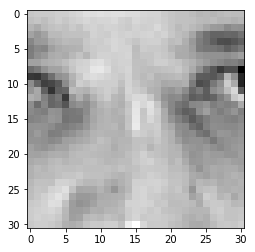

In [118]:
plt.imshow(cropped.real, "gray")